# Delivery Time Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv("datasets/deliverytime.txt")
df=df.copy()
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696793,15.000000,25.000000,29.000000,34.000000,50.000000
Delivery_person_Ratings,45593.0,4.632367,0.327708,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Time_taken(min),45593.0,26.294607,9.383806,10.000000,19.000000,26.000000,32.000000,54.000000


In [5]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [6]:
df[["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982
...,...,...,...,...
45588,26.902328,75.794257,26.912328,75.804257
45589,0.000000,0.000000,0.070000,0.070000
45590,13.022394,80.242439,13.052394,80.272439
45591,11.001753,76.986241,11.041753,77.026241


In [7]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
df['distance(km)'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance(km)'] = distcalculate(df.loc[i, 'Restaurant_latitude'], 
                                        df.loc[i, 'Restaurant_longitude'], 
                                        df.loc[i, 'Delivery_location_latitude'], 
                                        df.loc[i, 'Delivery_location_longitude'])

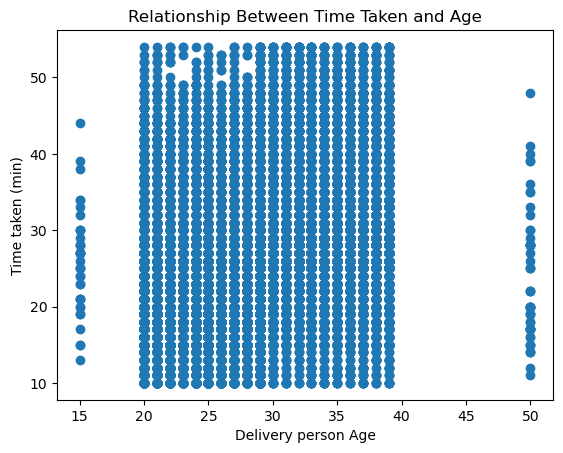

In [8]:
fig, ax = plt.subplots()
scatter = ax.scatter(x=df['Delivery_person_Age'], y=df['Time_taken(min)'])

ax.set_xlabel('Delivery person Age')
ax.set_ylabel('Time taken (min)')
ax.set_title('Relationship Between Time Taken and Age')

plt.show()


In [9]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance(km)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [10]:
df = df.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude","ID","Delivery_person_ID"])
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance(km)
0,37,4.9,Snack,motorcycle,24,3.025149
1,34,4.5,Snack,scooter,33,20.183530
2,23,4.4,Drinks,motorcycle,26,1.552758
3,38,4.7,Buffet,motorcycle,21,7.790401
4,32,4.6,Snack,scooter,30,6.210138


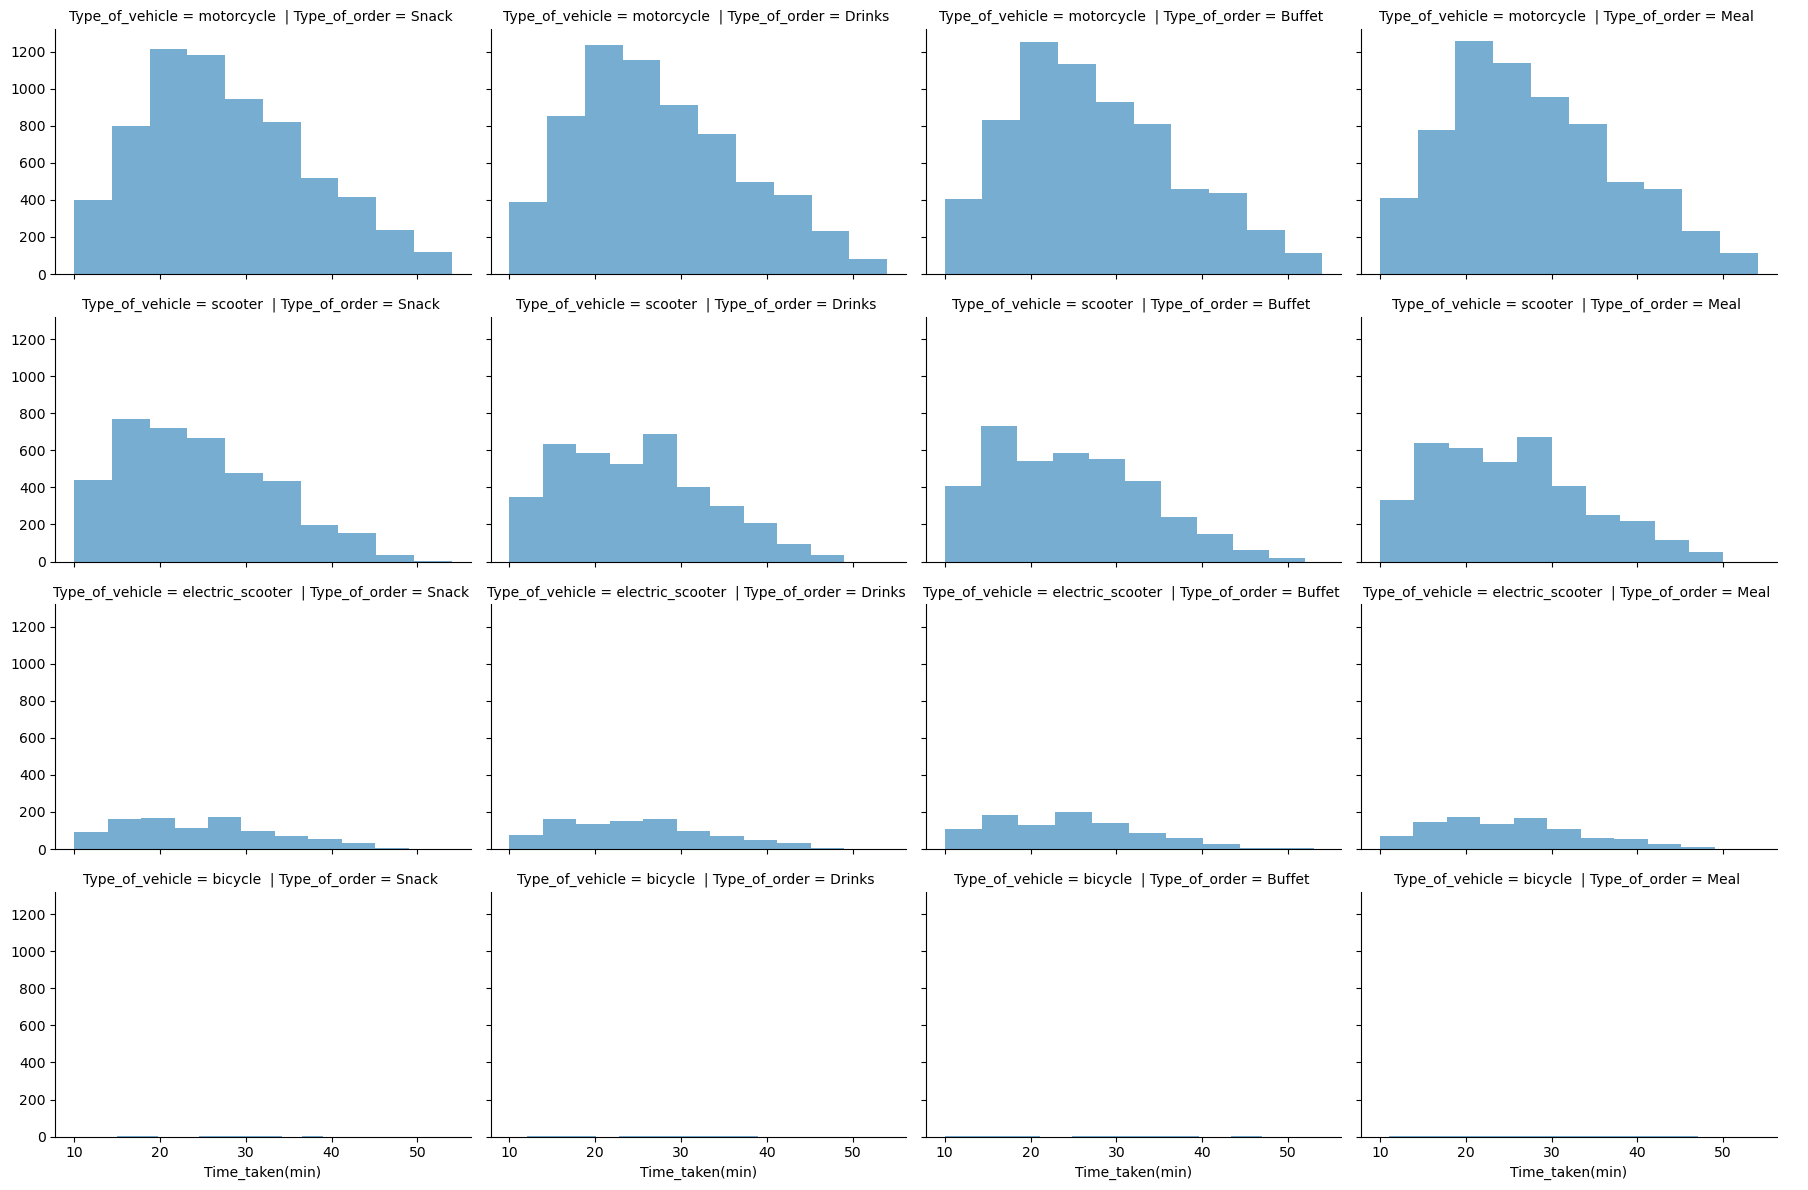

In [11]:
grid = sns.FacetGrid(df, col='Type_of_order', row='Type_of_vehicle', aspect=1.5)
grid.map(plt.hist, 'Time_taken(min)', alpha=0.6, bins=10)
grid.add_legend();

In [12]:
df["Type_of_vehicle"].value_counts()
#COULDN'T DROP BICYCLE

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

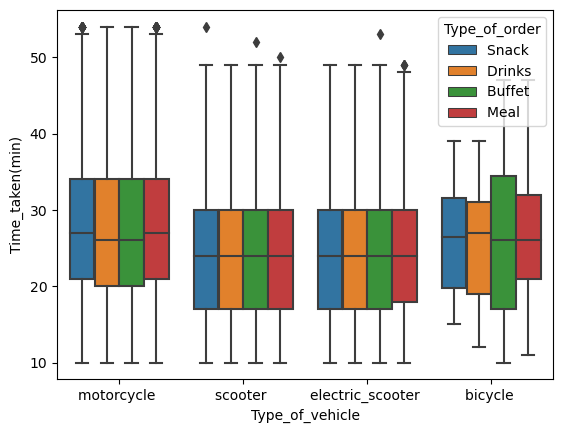

In [13]:
sns.boxplot(x="Type_of_vehicle", y="Time_taken(min)", hue="Type_of_order", data=df);

In [14]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Type_of_order,Type_of_vehicle,Time_taken(min),distance(km)
0,37,4.9,Snack,motorcycle,24,3.025149
1,34,4.5,Snack,scooter,33,20.183530
2,23,4.4,Drinks,motorcycle,26,1.552758
3,38,4.7,Buffet,motorcycle,21,7.790401
4,32,4.6,Snack,scooter,30,6.210138


In [15]:
df=pd.get_dummies(df, columns=['Type_of_order', 'Type_of_vehicle'])

In [16]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance(km),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,4.9,24,3.025149,0,0,0,1,0,0,1,0
1,34,4.5,33,20.183530,0,0,0,1,0,0,0,1
2,23,4.4,26,1.552758,0,1,0,0,0,0,1,0
3,38,4.7,21,7.790401,1,0,0,0,0,0,1,0
4,32,4.6,30,6.210138,0,0,0,1,0,0,0,1


In [17]:
df["Delivery_person_Age"].describe()

count    45593.000000
mean        29.544075
std          5.696793
min         15.000000
25%         25.000000
50%         29.000000
75%         34.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

In [18]:
df['AgeBand'] = pd.cut(df['Delivery_person_Age'], 4)

In [19]:
df['AgeBand'].value_counts()

(23.75, 32.5]      21465
(32.5, 41.25]      15465
(14.965, 23.75]     8610
(41.25, 50.0]         53
Name: AgeBand, dtype: int64

In [20]:
df = pd.get_dummies(df, ['AgeBand'])

In [21]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),distance(km),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,"AgeBand_(14.965, 23.75]","AgeBand_(23.75, 32.5]","AgeBand_(32.5, 41.25]","AgeBand_(41.25, 50.0]"
0,37,4.9,24,3.025149,0,0,0,1,0,0,1,0,0,0,1,0
1,34,4.5,33,20.183530,0,0,0,1,0,0,0,1,0,0,1,0
2,23,4.4,26,1.552758,0,1,0,0,0,0,1,0,1,0,0,0
3,38,4.7,21,7.790401,1,0,0,0,0,0,1,0,0,0,1,0
4,32,4.6,30,6.210138,0,0,0,1,0,0,0,1,0,1,0,0


In [22]:
df.drop(["Delivery_person_Age"],axis=1,inplace=True)

In [23]:
df.head()

,Delivery_person_Ratings,Time_taken(min),distance(km),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,"AgeBand_(14.965, 23.75]","AgeBand_(23.75, 32.5]","AgeBand_(32.5, 41.25]","AgeBand_(41.25, 50.0]"
0,4.9,24,3.025149,0,0,0,1,0,0,1,0,0,0,1,0
1,4.5,33,20.183530,0,0,0,1,0,0,0,1,0,0,1,0
2,4.4,26,1.552758,0,1,0,0,0,0,1,0,1,0,0,0
3,4.7,21,7.790401,1,0,0,0,0,0,1,0,0,0,1,0
4,4.6,30,6.210138,0,0,0,1,0,0,0,1,0,1,0,0


In [24]:
df.head()

,Delivery_person_Ratings,Time_taken(min),distance(km),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,"AgeBand_(14.965, 23.75]","AgeBand_(23.75, 32.5]","AgeBand_(32.5, 41.25]","AgeBand_(41.25, 50.0]"
0,4.9,24,3.025149,0,0,0,1,0,0,1,0,0,0,1,0
1,4.5,33,20.183530,0,0,0,1,0,0,0,1,0,0,1,0
2,4.4,26,1.552758,0,1,0,0,0,0,1,0,1,0,0,0
3,4.7,21,7.790401,1,0,0,0,0,0,1,0,0,0,1,0
4,4.6,30,6.210138,0,0,0,1,0,0,0,1,0,1,0,0


In [25]:
df["distance(km)"].describe()

count    45593.000000
mean        99.303911
std       1099.731281
min          1.465067
25%          4.663493
50%          9.264281
75%         13.763977
max      19692.674606
Name: distance(km), dtype: float64

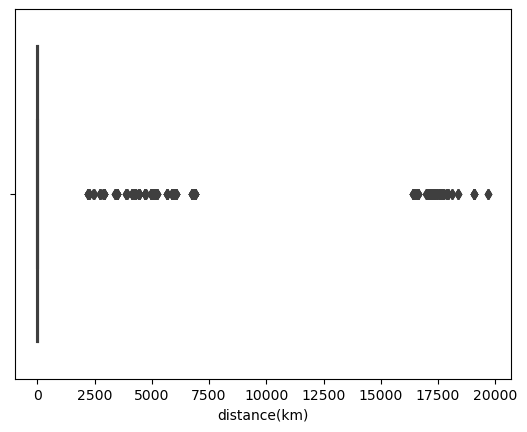

In [26]:
sns.boxplot(df["distance(km)"]);

In [27]:
df = df[df['distance(km)']<1500]

In [28]:
df["distance(km)"].describe()

count    45162.000000
mean         9.735396
std          5.608508
min          1.465067
25%          4.663412
50%          9.220209
75%         13.681490
max         20.969489
Name: distance(km), dtype: float64

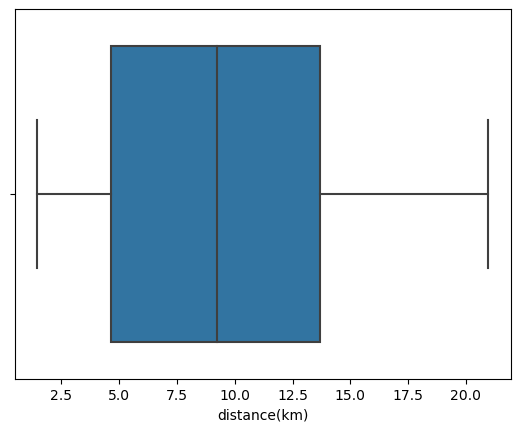

In [29]:
sns.boxplot(df["distance(km)"]);

In [30]:
df['distance(km)'] = pd.cut(df['distance(km)'], 5)

In [31]:
df = pd.get_dummies(df, ['distance(km)'])
df.head()

,Delivery_person_Ratings,Time_taken(min),Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,"AgeBand_(14.965, 23.75]","AgeBand_(23.75, 32.5]","AgeBand_(32.5, 41.25]","AgeBand_(41.25, 50.0]","distance(km)_(1.446, 5.366]","distance(km)_(5.366, 9.267]","distance(km)_(9.267, 13.168]","distance(km)_(13.168, 17.069]","distance(km)_(17.069, 20.969]"
0,4.9,24,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
1,4.5,33,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,4.4,26,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,4.7,21,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,4.6,30,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


# Modeling

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
X=df.drop("Time_taken(min)", axis=1)
y=df["Time_taken(min)"]
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                test_size=0.20,
                                                random_state=42)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

model = LinearRegression(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error: %.2f' % rmse)


Root mean squared error: 7.99


In [35]:
X_train

,Delivery_person_Ratings,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,"AgeBand_(14.965, 23.75]","AgeBand_(23.75, 32.5]","AgeBand_(32.5, 41.25]","AgeBand_(41.25, 50.0]","distance(km)_(1.446, 5.366]","distance(km)_(5.366, 9.267]","distance(km)_(9.267, 13.168]","distance(km)_(13.168, 17.069]","distance(km)_(17.069, 20.969]"
25073,4.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
33321,4.7,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
16757,4.5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
35585,4.8,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
14436,5.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11412,4.9,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
45161,4.6,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
38526,4.6,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
867,4.8,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [36]:
#Delivery_person_Ratings=5,Type_of_order_Meal,Type_of_vehicle_motorcycle,AgeBand_(23.75, 32.5],distance(km)_(5.366, 9.267]		
features = np.array([[4.4,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

Predicted Delivery Time in Minutes =  [26.89257812]
